In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

In [10]:
data = pd.DataFrame({'x':[10,40,38,48,19,34,24,45,52,51,15,55,57,62,64,68,77,71],
                      'y':[29,19,20,42,44,36,55,59,63,70,66,62,58,23,14,8,19,7]})

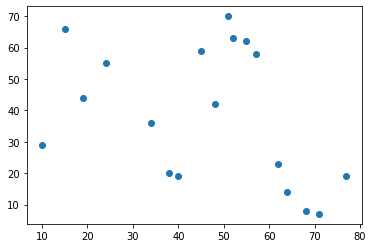

In [11]:
plt.scatter(data['x'], data['y'])
plt.show()

In [15]:
centroids={i+1:[np.random.randint(0,80),np.random.randint(0,80)] 
          for i in range(4)}

print(centroids)

{1: [27, 49], 2: [48, 6], 3: [70, 74], 4: [11, 54]}


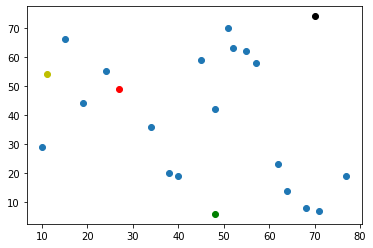

In [16]:
plt.scatter(data['x'],data['y'])
colmap={1:'r',2:'g',3:'black',4:'y'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.show()

In [17]:
def func(data,centroids):
    for i in centroids.keys():
        data['distance_from_{}'.format(i)]=np.sqrt((data['x']-centroids[i][0])**2)+((data['y']-centroids[i][1])**2)
    return(data)
data = func(data,centroids)
print(data.head())

    x   y  distance_from_1  distance_from_2  distance_from_3  distance_from_4
0  10  29            417.0            567.0           2085.0            626.0
1  40  19            913.0            177.0           3055.0           1254.0
2  38  20            852.0            206.0           2948.0           1183.0
3  48  42             70.0           1296.0           1046.0            181.0
4  19  44             33.0           1473.0            951.0            108.0


In [18]:
def func1(data,centroids):
    #sqrt((x1-x2)^2+(y1-y2)^2)
    for i in centroids.keys():
         data['distance_from_{}'.format(i)]=np.sqrt((data['x']-centroids[i][0])**2)+((data['y']-centroids[i][1])**2)
    data['closest']=data.loc[:,'distance_from_1':].idxmin(axis=1)
    data['closest']=data['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    data['color']=data['closest'].map(lambda x:colmap[x])
    return(data)
data = func1(data,centroids)
print(data.head())

    x   y  distance_from_1  distance_from_2  distance_from_3  distance_from_4  \
0  10  29            417.0            567.0           2085.0            626.0   
1  40  19            913.0            177.0           3055.0           1254.0   
2  38  20            852.0            206.0           2948.0           1183.0   
3  48  42             70.0           1296.0           1046.0            181.0   
4  19  44             33.0           1473.0            951.0            108.0   

   closest color  
0        1     r  
1        2     g  
2        2     g  
3        1     r  
4        1     r  


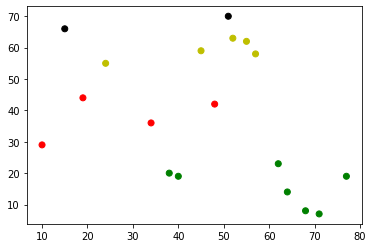

In [19]:
plt.scatter(data['x'], data['y'], color = data['color'])
plt.show()

In [20]:
import copy
old_centroids=copy.deepcopy(centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(data[data['closest']==i]['x'])
        centroids[i][1]=np.mean(data[data['closest']==i]['y'])
    return(k)
centroids=update(centroids)

print("Old Centroids: ", old_centroids)
print("Centroids: ", centroids)

Old Centroids:  {1: [27, 49], 2: [48, 6], 3: [70, 74], 4: [11, 54]}
Centroids:  {1: [27.75, 37.75], 2: [60.0, 15.714285714285714], 3: [33.0, 68.0], 4: [46.6, 59.4]}
